eda:
در این مرحله با نگاهی کلی به دیتاست، وضعیت ویژگی‌ها و اهمیت و تاثیر آنها در یادگیری را بررسی می‌کنیم.


In [1]:
import seaborn as sns
import pandas as ps
import numpy as np


data = ps.read_csv("train_data.csv")

In [2]:
data.describe()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
count,1.499000e+03,1.499000e+03,1499.0,1499.0,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1.499000e+03,1.499000e+03,1499.000000
mean,4.705156e+06,1.578430e+12,4.0,0.0,4297.502335,4262.453636,3305.623749,160.841227,7984.653102,0.190127,0.374249,1.414276,625.858572,4.596871e+06,2.250510e+06,0.247498
std,5.028895e+03,4.086461e+05,0.0,0.0,2891.256929,2509.592221,2004.342260,338.769903,3946.856007,0.392532,0.675257,2.822726,1963.385449,2.516371e+06,8.081675e+05,0.431703
min,4.608522e+06,1.578429e+12,4.0,0.0,202.000000,286.000000,6.000000,0.000000,244.000000,0.000000,0.000000,0.000000,0.000000,1.390000e+02,3.256000e+03,0.000000
25%,4.705047e+06,1.578429e+12,4.0,0.0,1386.000000,1587.000000,1819.000000,18.000000,6092.000000,0.000000,0.000000,0.000000,19.000000,3.715727e+06,2.236982e+06,0.000000
50%,4.705400e+06,1.578430e+12,4.0,0.0,4187.000000,4198.000000,3914.000000,31.000000,7759.000000,0.000000,0.000000,0.000000,32.000000,6.161066e+06,2.687991e+06,0.000000
75%,4.705825e+06,1.578430e+12,4.0,0.0,6883.000000,6471.000000,5179.000000,80.000000,10975.000000,0.000000,1.000000,1.000000,85.000000,6.244430e+06,2.688306e+06,0.000000
max,4.706267e+06,1.578430e+12,4.0,0.0,10081.000000,9423.000000,5434.000000,1529.000000,14284.000000,1.000000,3.000000,26.000000,12396.000000,6.247342e+06,2.688642e+06,1.000000


ماتریس کوریلیشن بین ویژگی‌ها بدین گونه است:

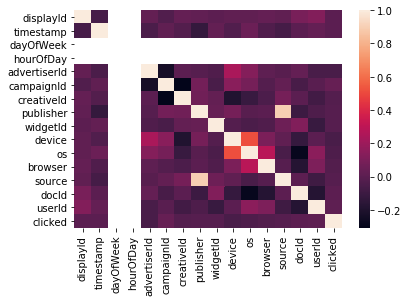

In [3]:
sns.heatmap(data.corr())

که در آن بین شناسه‌های کاربر، نمایش و زمان رابطه وجود دارد. البته که این رابطه کاذب است و به علت است که شناسه‌ها اعدادی صعودی اند و وا ورود کاربر در زمان‌های بعدی، شناسه‌های بزرگتری برای کاربر و نمایش به کاربر درنظر گرفته می‌شود.  

پس این روابط ارزشی در یادگیری ندارند. همچنین بین پلتفرم و سیستم‌عامل هم رابطه وجود دارد که مربوط به حوزه مطلوب ما نیست و دلایل معلوم دیگری دارد. منبع هم رابطه‌ای با منتشر کننده دارد که بنا به رابطه صفحات با سایت میزبان است و در صورتی که بخواهیم سایت‌ها را به تفکیک صفحات بررسی کنیم بدرد می‌خورد.

ویژگی شناسه کاربر را بررسی می‌کنیم:

/home/mohammad/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(4.29512893982808, <matplotlib.axes._subplots.AxesSubplot at 0x7febcefc5d00>)

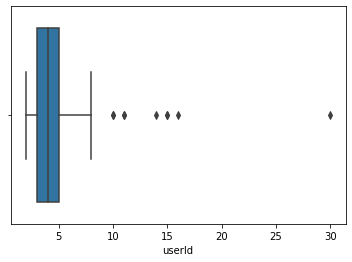

In [4]:
(np.mean(data.userId.value_counts()), sns.boxplot(data.userId.value_counts()))

می‌بینیم که از تعداد بسیار زیادی از کاربران داده‌های بسیار کمی دارم یعنی به‌طور کلی نمی‌توانیم .روی هر کابر تحلیل جداگانه بزنیم و احتمال مراجعه به تبلیغ را به طور جداگانه برای او پیدا کنیم. با توجه به رندم بودن این ویژگی، میتوانیم آن را کنار بگذاریم.  

حال ویژگی زمانی را بررسی می‌کنیم. تعداد یکتای این ویژگی بسیار بالاست و از نظر منطقی این ویژگی کمکی در یادگیری نمی‌کند. (مانند ویژگی زمان)

/home/mohammad/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimen

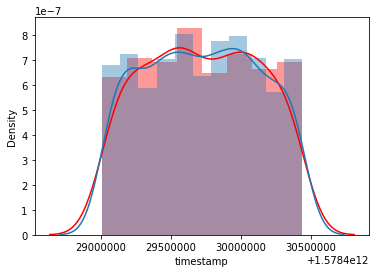

In [5]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.distplot(clicked.timestamp, color='red')
sns.distplot(unclicked.timestamp)


بنابر این تا اینجا ویژگی‌های زمان، شناسه‌ نمایش ، شناسه کاربر و سیستم‌عامل را کنار میگذاریم و استفاده ار ناشر بسته به انتخاب ما است. حال به سراغ ویژگی‌های زمان هفته و روز می‌رویم. نمودار تبلیغات کلیک شده و نشده برای هر ویژگی را رسم می‌کنیم:

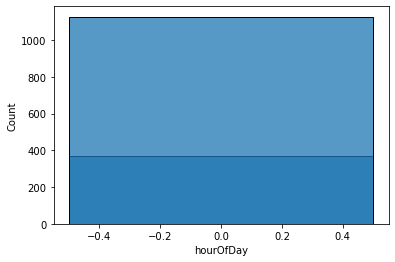

In [6]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.histplot(clicked.hourOfDay)
sns.histplot(unclicked.hourOfDay)

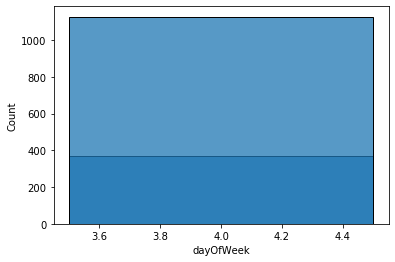

In [7]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.histplot(clicked.dayOfWeek)
sns.histplot(unclicked.dayOfWeek)

می‌بینیم که نسبت تبلیغات مراجعه شده و نشده در روز‌ها و ساعت مختلف برابر است. یعنی این ویژگی اگر به نتهایی و جدا از دیگر ویژگی‌ها (مانند شناسه کاربر و محتوای تبلیغ) بررسی شود، کمکی نخواهد کرد. اما در روش ‌هایی که تاثیر مقادیر مختلف دو متغیر را در نظر می‌گیرد (مانند ماشین فکتوریزیشن) این ویژگی‌ها ممکن است به‌کار آید. زیرا ممکن است هر فرد در ساعات خاصی یا برای محتوا‌های خاصی بیشتر به تبلیغ‌مراجعه کند. (علایق و زمان‌های کاری افراد متفاوت است.)

In [8]:
data.describe()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
count,1.499000e+03,1.499000e+03,1499.0,1499.0,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1.499000e+03,1.499000e+03,1499.000000
mean,4.705156e+06,1.578430e+12,4.0,0.0,4297.502335,4262.453636,3305.623749,160.841227,7984.653102,0.190127,0.374249,1.414276,625.858572,4.596871e+06,2.250510e+06,0.247498
std,5.028895e+03,4.086461e+05,0.0,0.0,2891.256929,2509.592221,2004.342260,338.769903,3946.856007,0.392532,0.675257,2.822726,1963.385449,2.516371e+06,8.081675e+05,0.431703
min,4.608522e+06,1.578429e+12,4.0,0.0,202.000000,286.000000,6.000000,0.000000,244.000000,0.000000,0.000000,0.000000,0.000000,1.390000e+02,3.256000e+03,0.000000
25%,4.705047e+06,1.578429e+12,4.0,0.0,1386.000000,1587.000000,1819.000000,18.000000,6092.000000,0.000000,0.000000,0.000000,19.000000,3.715727e+06,2.236982e+06,0.000000
50%,4.705400e+06,1.578430e+12,4.0,0.0,4187.000000,4198.000000,3914.000000,31.000000,7759.000000,0.000000,0.000000,0.000000,32.000000,6.161066e+06,2.687991e+06,0.000000
75%,4.705825e+06,1.578430e+12,4.0,0.0,6883.000000,6471.000000,5179.000000,80.000000,10975.000000,0.000000,1.000000,1.000000,85.000000,6.244430e+06,2.688306e+06,0.000000
max,4.706267e+06,1.578430e+12,4.0,0.0,10081.000000,9423.000000,5434.000000,1529.000000,14284.000000,1.000000,3.000000,26.000000,12396.000000,6.247342e+06,2.688642e+06,1.000000


In [9]:
y = data["clicked"]
x = data.drop(data.columns[[0, 1, 7, 8, 11, 14, 15]] , axis=1)
x_test = x.iloc[0:int(0.2*len(x))]
x_train = x[int(0.2*len(x)):]
y_train = y[int(0.2*len(y)):]
y_test = y.iloc[0:int(0.2*len(y))]

svm:

In [16]:
from sklearn import svm
from sklearn import metrics
clsf = svm.SVC(C=4)
clsf.fit(x_train, y_train)
y_pred = clsf.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

AUC : 0.5000
Cross-entropy loss : 8.3170 
F1 score : 0.7592


boosting:
بوستینگ یک فرا الگوریتم ترکیبی در حوزه یادگیری ماشین است که برای کاهش عدم توازن و همچنین واریانس به کار می‌رود. این روش در یادگیری با نظارت مورد استفاده قرار گرفته و از خانواده الگوریتم‌های یادگیری ماشین به شمار می‌رود. این تکنیک، روشی برای تبدیل سیستمهای یادگیری ضعیف به قوی بر اساس ترکیب نتایج طبقه بندهای مختلف است. ایده اولیه این روش بر اساس سؤال مطرح شده توسط کیرنس و شجاع (۱۹۸۸، ۱۹۸۹) به وجود آمده است: آیا می‌توان با ترکیب مجموعه‌ای از سیستم‌های یادگیری ضعیف یک سیستم یادگیری قوی ایجاد نمود؟

سیستم یادگیری ضعیف، یادگیرنده‌ای است که به عنوان یک طبقه بند، تنها کمی بهتر از حالت تصادفی عمل می‌نماید (برچسب نمونه‌ها را بهتر از تصادفی حدس می‌زند). در مقابل یادگیرنده قوی طبقه‌بندی است که به تنهایی می‌تواند برچسب نمونه‌ها را خوبی پیش بینی نماید.

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Classification
clf_boosting = xgb.XGBClassifier(n_estimators=100, reg_lambda=1,reg_alpha=1, gamma=0, max_depth=None)
# n_estimator is num of gradient boosted trees # reg_alpha and reg_lmbda are regularization term # gamma is Minimum loss
clf_boosting.fit(x_train,y_train)
# Prediction
y_pred = clf_boosting.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

/home/mohammad/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC : 0.5347
Cross-entropy loss : 10.9740 
F1 score : 0.6823


random:

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000,max_depth=3000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

AUC : 0.5460
Cross-entropy loss : 10.6274 
F1 score : 0.6923


logestic:

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver="saga",multi_class="ovr",max_iter=1000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

AUC : 0.5000
Cross-entropy loss : 8.3170 
F1 score : 0.7592


/home/mohammad/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
